# Support Vector Machines with Kernel

In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython import display

In [163]:
X, y = make_blobs(centers = 4, random_state = 8)
z = y
y = y%2
np.array([z,y])

array([[3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
        0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
        0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
        3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
        2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1],
       [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1]])

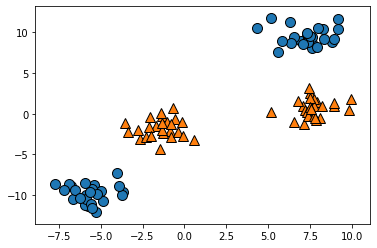

In [165]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


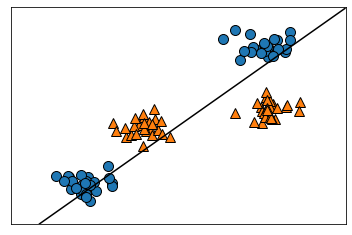

In [167]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0],X[:,1], y)

We improve by create features out of current features:

In [169]:
X_new = np.hstack([X,X[:,1:]**2])

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


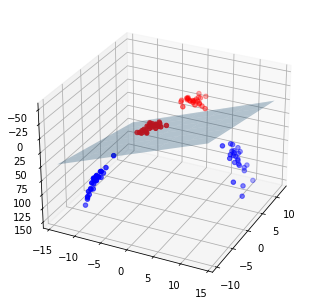

In [174]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
mask = y==0
mask1 = y!=0
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:,0].min()-2,X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2,X_new[:,1].max()+2,50)
XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX+coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX,YY,ZZ,rstride= 8,cstride = 8, alpha = 0.3)
ax.scatter(X_new[mask,0],X_new[mask,1],X_new[mask,2],c = 'b')
ax.scatter(X_new[mask1,0],X_new[mask1,1],X_new[mask1,2], c = 'r')

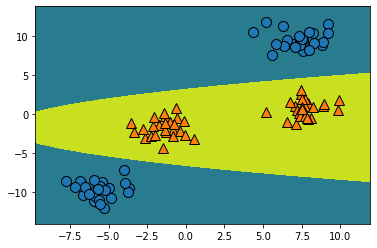

In [177]:
ZZ = YY**2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(),YY.ravel(),ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape),levels=[dec.min(),0,dec.max()])
mglearn.discrete_scatter(X[:,0],X[:,1],y)

But we do not know which feature we have to add and modify. And the computation effort for modifying all is too big. Therefore, we have the Kernel-Trick. We know the polynomial Kernel (computes for each feature the polynomial to a certain degree) and Kernel with radial Basisfunction (RBF/Gaussscher Kernel). 

We have two parameters. Gamma tells us the width of the Kernel and C is the already known regularisation parameter.

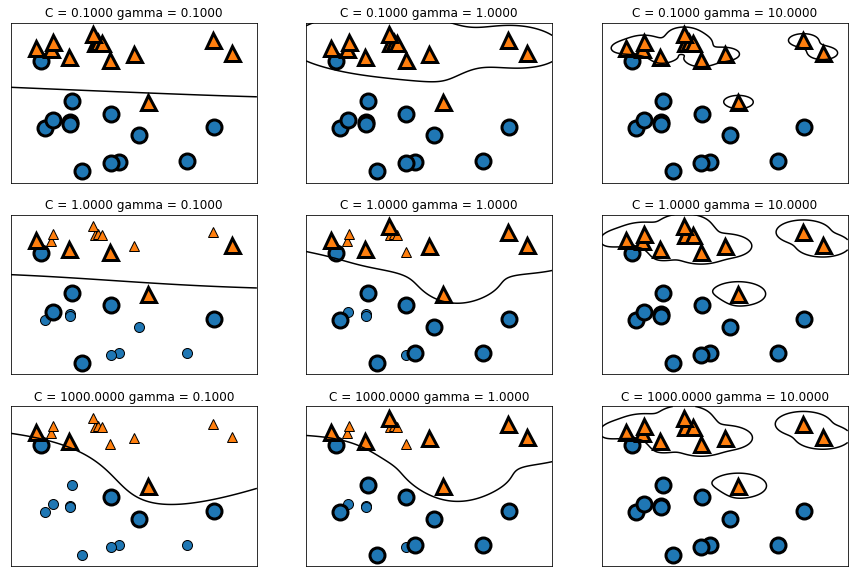

In [178]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X,y)

fig, axes = plt.subplots(3,3,figsize = (15,10))

for ax, C in zip(axes,[-1,0,3]):
    for a, gamma in zip(ax, range(-1,2)):
        mglearn.plots.plot_svm(log_C=C,log_gamma=gamma,ax=a)

In [183]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,
                                                    random_state = 0)

training_accuracy = []
test_accuracy = []
Cs = np.arange(100)/100+0.01

for C in Cs:
    logreg = SVC(kernel = 'rbf', C = C, gamma = 1).fit(X_train,y_train)
    training_accuracy.append(logreg.score(X_train,y_train))
    test_accuracy.append(logreg.score(X_test,y_test))

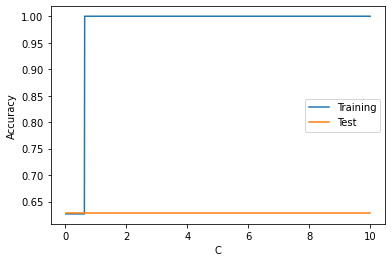

In [184]:
plt.plot(Cs, training_accuracy, label = "Training")
plt.plot(Cs, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

In [190]:
training_accuracy = []
test_accuracy = []
Cs = np.arange(1000)/100+0.01

for C in Cs:
    logreg = SVC(kernel = 'rbf', C = 1, gamma = C).fit(X_train,y_train)
    training_accuracy.append(logreg.score(X_train,y_train))
    test_accuracy.append(logreg.score(X_test,y_test))

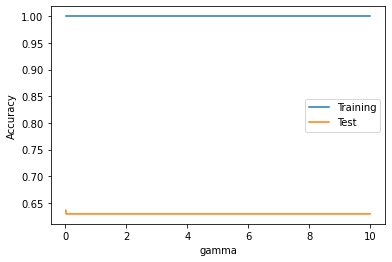

In [191]:
plt.plot(Cs, training_accuracy, label = "Training")
plt.plot(Cs, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

Results are bad because we should scale the features:

In [192]:
min_on_training = X_train.min(axis = 0)
range_on_training = (X_train-min_on_training).max(axis=0)
X_train_scaled=(X_train-min_on_training)/range_on_training
X_test_scaled=(X_test-min_on_training)/range_on_training

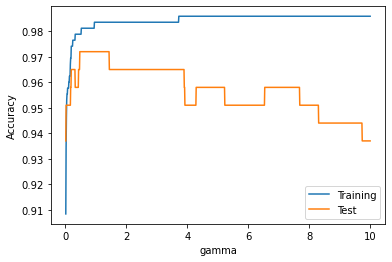

In [196]:
training_accuracy = []
test_accuracy = []
Cs = np.arange(1000)/100+0.01

for C in Cs:
    logreg = SVC(kernel = 'rbf', C = 1, gamma = C).fit(X_train_scaled,y_train)
    training_accuracy.append(logreg.score(X_train_scaled,y_train))
    test_accuracy.append(logreg.score(X_test_scaled,y_test))
    
plt.plot(Cs, training_accuracy, label = "Training")
plt.plot(Cs, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("gamma")
plt.legend()

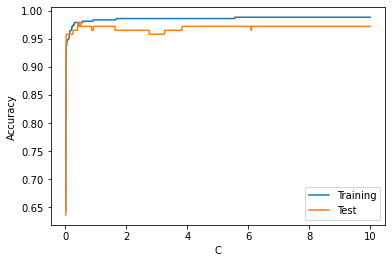

In [197]:
training_accuracy = []
test_accuracy = []
Cs = np.arange(1000)/100+0.01

for C in Cs:
    logreg = SVC(kernel = 'rbf', C = C, gamma = 1).fit(X_train_scaled,y_train)
    training_accuracy.append(logreg.score(X_train_scaled,y_train))
    test_accuracy.append(logreg.score(X_test_scaled,y_test))
    
plt.plot(Cs, training_accuracy, label = "Training")
plt.plot(Cs, test_accuracy, label = "Test")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()